<a href="https://colab.research.google.com/github/AguaClara/Textbook/blob/master/Colab/AC_Textbook_Chapter9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Chapter 9: Clarification

This is a corresponding Colab document for the ninth chapter of the AguaClara textbook.

In [1]:
!pip install aguaclara

     |████████████████████████████████| 94 kB 1.9 MB/s 
     |████████████████████████████████| 209 kB 16.9 MB/s 
     |████████████████████████████████| 2.1 MB 32.3 MB/s 
     |████████████████████████████████| 109 kB 55.9 MB/s 
     |████████████████████████████████| 546 kB 49.9 MB/s 
  Created wheel for aguaclara: filename=aguaclara-0.2.10-py3-none-any.whl size=107244 sha256=abdbe6b8c94fce35e144d204689f2077095b4c0fd4bd71e9d53f4b0dbfbe383b
  Stored in directory: /root/.cache/pip/wheels/a3/12/ef/53d591c580e122cb62a84cb2180ddba9ba03bb3dc85b19285e
Successfully built aguaclara


#Example: Optimizing the transition from the flocculator to floc blanket

In [2]:
import aguaclara.core.physchem as pc
from aguaclara.core.units import unit_registry as u

import numpy as np
import matplotlib.pyplot as plt
#I played with the velocity gradient to get a reasonable head loss of 50 cm.
G_CS = 123 * u.Hz
density_clay = 2650 * u.kg/u.m**3
#From William's research the k for flocculator is 0.03. We need to confirm that this value is correct.
k = 0.03
# It isn't clear what value should be used for alpha
alpha = 0.5
# The following 3 values are estimates from Casey's floc blanket video.
C_infb = 40 * u.NTU
C_outfb = 1 * u.NTU
t_fb = 800 * u.s
k_fb = -1/t_fb*(np.log(C_outfb/C_infb))
C_out_f = (np.pi* density_clay/6 * (k_fb/(np.pi*alpha*k*G_CS))**(3/2)).to(u.NTU)
print('The concentration of primary particles in the flocculated water is',C_out_f)

Gt = (3/2 * 1/(k*np.pi * alpha) * (np.pi/6 * density_clay/C_out_f)**(2/3)).to(u.dimensionless)
print('The flocculator Gt value is ',Gt)
t_floc = 3/2 * 1/k_fb
print('The flocculator residence time is',t_floc)

Temp = 20 * u.degC

Floc_HL = (G_CS**2 * t_floc * pc.viscosity_kinematic(Temp)/u.standard_gravity).to(u.cm)
print('The head loss through the flocculator is',Floc_HL)

The concentration of primary particles in the flocculated water is 21.18 NTU
The flocculator Gt value is  4.001e+04 dimensionless
The flocculator residence time is 325.3 second
The head loss through the flocculator is 50.36 centimeter


/usr/local/lib/python3.7/dist-packages/aguaclara/core/physchem.py:157: UserWarning: viscosity_kinematic is deprecated; use viscosity_kinematic_water instead.
  'viscosity_kinematic_water instead.', UserWarning)


#Initializing Constants for Examples:

In [3]:
# We are experimenting with using head loss at the exit of the diffusers as
# a reasonable design constraint for the design of the
# inlet manifold/diffuser system. This head loss in the exit of the diffuser
# will allow higher velocities (and pressure recovery) in the manifold pipe
# and thus will enable use of smaller diameter manifold pipes.
# -----
# We've set a maximum head loss in the clarifier inlet:
headloss_sed_inlet_max = 1 * u.cm

# The manifold and diffuser pipes used in the clarifier have an SDR of 26.
SDR=26

# Pi_jet_plane is used to estimate the maximum energy dissipation rate in a plane jet.
# A plane jet is uniform in one dimension. A plane jet can be formed by a long narrow slot.
# see table_EDR_G_equations
Pi_jet_plane = 0.0124

# Design temperature will be helpful to calculate viscosity
T_design = 15*u.degC

# Plant Flowrate:
flow_plant = 60 * u.L/u.s

# Upflow velocity at the top of the floc blanket:
V_sed_up = 1 * u.mm/u.s

# The corrugated plastic sheets used to make the plate settlers:
W_sed = 42 * u.inch
thickness_sed_plate = 2 * u.mm

# The plate settlers are angled 60° from the horizontal:
angle_sed_plate = 60 * u.deg

# The plate setters are spaced 2.5cm apart (this is the perpendicular
# distance between plates, not the horizontal distance between plates):
s_sed_plate = 2.5 * u.cm

# Plate settler capture velocity:
V_sed_capture = 0.12 * u.mm/u.s

# The minimum port flow (from the first port) divided by the maximum port
# flow (from the last port) for flow division between clarifiers
# and for flow distribution from the inlet manifold should be at least:
Pi_sed_manifold_flow = 0.8


#Example: Floc recycle

Finding relationship between collision potential and recycle ratio:

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


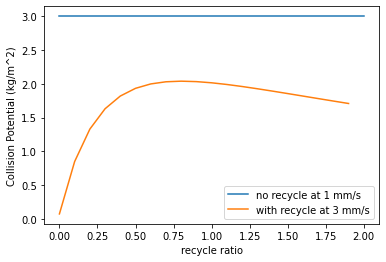

In [4]:
import aguaclara.core.physchem as pc
from aguaclara.core.units import unit_registry as u

import numpy as np
import matplotlib.pyplot as plt

D_fb=2.5*u.cm
A_fb = pc.area_circle(D_fb)
H_fb = 1 * u.m
v_hindered = 1 * u.mm/u.s
C_fb_conventional = 3 * u.g/u.L
C_recycle = 20 * u.g/u.L
C_plant = 100 * u.NTU
v_up = 3 * u.mm/u.s


def CP(H_fb,v_up,v_hindered,Pi_recycle,C_plant,C_recycle):
 return (H_fb*v_hindered/v_up*(C_plant+C_recycle*Pi_recycle)/((1+Pi_recycle)*(1+Pi_recycle-v_hindered/v_up))).to_base_units()
Pi_recycle_max = 2
Pi_recycle = np.arange(0,Pi_recycle_max,0.1)
fig, ax = plt.subplots()
x=np.array([0,Pi_recycle_max])
yscale = (C_fb_conventional*H_fb*v_hindered/(1*u.mm/u.s)).to_base_units()
yscale
y=np.array([1,1])*yscale
ax.plot(x,y)
ax.plot(Pi_recycle,CP(H_fb,v_up,v_hindered,Pi_recycle,C_plant,C_recycle))
imagepath = 'Clarification/Images/'
ax.set(xlabel='recycle ratio', ylabel='Collision Potential (kg/m^2)')
ax.legend(["no recycle at 1 mm/s","with recycle at 3 mm/s"])
plt.show()

Solve for tube diameter:

In [5]:
import aguaclara.core.physchem as pc
from aguaclara.core.units import unit_registry as u

import numpy as np
import matplotlib.pyplot as plt

Temperature= 20*u.degC
D_fb=2.5*u.cm
A_fb = pc.area_circle(D_fb)
H_fb = 1.5 * u.m
Angle_tube = 60*u.deg
L_tube = H_fb/np.sin(Angle_tube)
density_clay=2650*u.kg/u.m**3

H_l = H_fb*(C_recycle-C_fb_conventional)/(C_recycle+((pc.density_water(Temperature)*density_clay)/(density_clay-pc.density_water(Temperature))))
H_l
Q_plant=v_up*A_fb
Pi_recycle=0.5
density_recycle = (1 - pc.density_water(Temperature)/density_clay)*C_recycle + pc.density_water(Temperature)
nu_recycle = pc.viscosity_dynamic(Temperature)/density_recycle
D_recycle = pc.diam_pipe(Q_plant*Pi_recycle,H_l,L_tube,nu_recycle,0.01*u.mm,2)
D_recycle.to(u.mm)
D_recycle.to(u.inch)

/usr/local/lib/python3.7/dist-packages/aguaclara/core/physchem.py:102: UserWarning: viscosity_dynamic is deprecated; use viscosity_dynamic_water instead.
  'viscosity_dynamic_water instead.', UserWarning)


0.16901316626766158 inch

Clarification Examples:

#Tube Settler Design:

Computing length of tube settler:

In [6]:
from aguaclara.core.units import unit_registry as u

import numpy as np

v_alpha = 3 * u.mm/u.s
v_c = 1 * u.mm/u.s
D = 2.54 * u.cm
alpha = 60 * u.deg

def L_settler(D,alpha,v_alpha,v_c):
 return D/np.cos(alpha)*(v_alpha/v_c - np.sin(alpha))

print(L_settler(D,alpha,v_alpha,1*u.mm/u.s))
print(L_settler(D,alpha,v_alpha,0.2*u.mm/u.s))

10.84 centimeter
71.8 centimeter


#Example: Diffuser and Jet Reverser Design:

In [7]:
from aguaclara.core.units import unit_registry as u
from aguaclara.core import utility as ut

import numpy as np

#given clarifier inlet maximum headloss
headloss_sed_inlet_max = 1 * u.cm
#given clarifier up flow velocity
V_sed_up = 1 * u.mm/u.s
#given clarifier width
W_sed = 42 * u.inch

Find max velocity of clarifier diffusers:

In [8]:
g = 9.81 * u.m / u.s**2
# minor loss equation with K=1
V_diffuser_max = (np.sqrt((2 * g * headloss_sed_inlet_max))).to(u.m / u.s)
print('The maximum velocity of the sed tank diffusers is',V_diffuser_max)

# mass conservation
W_diffuser_inner_min = ((V_sed_up / V_diffuser_max) * W_sed).to(u.mm)
print('The minimum width of the sed tank diffusers is',W_diffuser_inner_min)

The maximum velocity of the sed tank diffusers is 0.4429 meter / second
The minimum width of the sed tank diffusers is 2.408 millimeter


Find minimum inner width of diffuser:

In [9]:
W_diffuser = ut.ceil_nearest(W_diffuser_inner_min, np.arange(1/16,1/4,1/16)*u.inch)

print('The width of sed tank diffuser is',W_diffuser.to(u.cm))

The width of sed tank diffuser is 0.3175 centimeter


Calculate inner and outer length of rectangular diffuser slot:

In [10]:
from aguaclara.core import pipes as pipe
SDR=26

# Assumed stretch of the PVC pipes as they are heated and molded:
Pi_PVC_stretch = 1.2

# Nominal diameter of the sed tank diffuser
ND_sed_diffuser = 1 * u.inch
#The cross-sectional area of the pipe wall is:
area_PVC = (np.pi/4) * ((pipe.OD(ND_sed_diffuser)**2) - (pipe.ID_SDR(ND_sed_diffuser,SDR)**2))

#The thickness of the wall is reduced by the stretch factor:
thickness_sed_diffuser_wall = ((pipe.OD(ND_sed_diffuser) - pipe.ID_SDR(ND_sed_diffuser,SDR)) / (2 * Pi_PVC_stretch))

# From geometry of the rectangular diffuser opening (assuming perfectly square corners) we have:
B_diffuser = ((area_PVC / (2 * thickness_sed_diffuser_wall)) - W_diffuser).to(u.cm)

print("Sed diffuser outer length:", B_diffuser)

S_diffuser = B_diffuser - (2 * thickness_sed_diffuser_wall)
print("Sed diffuser inner length:", S_diffuser)

Sed diffuser outer length: 5.736 centimeter
Sed diffuser inner length: 5.522 centimeter


Determine diffuser velocity:

In [11]:
flow_max_diffuser = V_sed_up * W_sed * B_diffuser
V_diffuser = (flow_max_diffuser / (W_diffuser * S_diffuser)).to(u.m / u.s)
print('The flow of water leaving a sed tank diffuser is',flow_max_diffuser.to(u.ml/u.s))
print('The velocity of water leaving the sed tank diffuser is',V_diffuser)

The flow of water leaving a sed tank diffuser is 61.19 milliliter / second
The velocity of water leaving the sed tank diffuser is 0.349 meter / second


Reynolds Number:

In [12]:
from aguaclara.core import physchem as pc
T_design = 15 * u.degC
Re_diffuser_jet = ((W_diffuser * V_diffuser) / pc.viscosity_kinematic(T_design)).to(u.dimensionless)
print('The Reynolds number for this jet is',Re_diffuser_jet)

The Reynolds number for this jet is 974.6 dimensionless


/usr/local/lib/python3.7/dist-packages/aguaclara/core/physchem.py:157: UserWarning: viscosity_kinematic is deprecated; use viscosity_kinematic_water instead.
  'viscosity_kinematic_water instead.', UserWarning)


In [13]:
Re_sed = ((W_sed * V_sed_up) / pc.viscosity_kinematic(T_design)).to(u.dimensionless)
print('Reynolds number through floc is',Re_sed)

Reynolds number through floc is 938.2 dimensionless


/usr/local/lib/python3.7/dist-packages/aguaclara/core/physchem.py:157: UserWarning: viscosity_kinematic is deprecated; use viscosity_kinematic_water instead.
  'viscosity_kinematic_water instead.', UserWarning)


Find max energy dissipation rate:

In [14]:
Pi_jet_plane = 0.0124
W_jet_reversed = W_sed * V_sed_up / V_diffuser
EDR_inlet_jet = Pi_jet_plane* ((V_diffuser**3)/ W_jet_reversed).to(u.mW / u.kg)
print('The energy dissipation rate for inlet jet is', EDR_inlet_jet)

The energy dissipation rate for inlet jet is 172.5 milliwatt / kilogram


Is it reasonable to neglect the upflow velocity in the sed tank when calculating this head loss?

In [15]:
hl_sed_diffuser_exit1 = (((V_diffuser - V_sed_up) ** 2) / (2 *g)).to(u.cm)
hl_sed_diffuser_exit2 = (((V_diffuser) ** 2) / (2 *g)).to(u.cm)
hl_sed_diffuser_error = (hl_sed_diffuser_exit2-hl_sed_diffuser_exit1)/hl_sed_diffuser_exit1

print('The best estimate of the exit head loss for the diffuser is', hl_sed_diffuser_exit1)
print('The 2nd estimate of the exit head loss for the diffuser ignoring the upflow velocity is', hl_sed_diffuser_exit2)
print('It is reasonable to neglect the effect of the upflow velocity. The error is',hl_sed_diffuser_error)

The best estimate of the exit head loss for the diffuser is 0.6173 centimeter
The 2nd estimate of the exit head loss for the diffuser ignoring the upflow velocity is 0.6209 centimeter
It is reasonable to neglect the effect of the upflow velocity. The error is 0.005755 dimensionless


#Example: Manifolds and Launders

Equation for maximum velocity for an inlet manifold in terms of diffuser exit velocity and flow distribution constraint:

In [16]:
def Vel_sed_manifold_max(Pi_diffuser_flow, V_diffuser):
  return (V_diffuser * np.sqrt(2 * ((1-(Pi_diffuser_flow**2)) / ((Pi_diffuser_flow**2)+1))))

In [17]:
Pi_sed_manifold_flow = 0.8
V_sed_manifold_max = Vel_sed_manifold_max(Pi_sed_manifold_flow, V_diffuser)
print('The maximum velocity in the clarifier manifold is',V_sed_manifold_max)

The maximum velocity in the clarifier manifold is 0.2313 meter / second


Determine flow area ratio:

In [18]:
print('The flow area ratio of manifold pipe to diffusers is',(V_diffuser / V_sed_manifold_max).to(u.dimensionless))


The flow area ratio of manifold pipe to diffusers is 1.509 dimensionless


Determine maximum flow rate:

In [19]:
L_sed_upflow_max = 5.8 * u.m
flow_sed_max = (L_sed_upflow_max * V_sed_up * W_sed).to(u.L / u.s)
print("The maximum flow rate in one clarifier is",flow_sed_max)

The maximum flow rate in one clarifier is 6.187 liter / second


Determine required nominal pipe diameter:

In [20]:
D_sed_manifold_min= pc.diam_circle(flow_sed_max / V_sed_manifold_max)
ND_sed_manifold = pipe.ND_SDR_available(D_sed_manifold_min, SDR)
print('The minimum inner diameter of the clarifier manifold is',D_sed_manifold_min.to(u.inch))
print('The nominal diameter of the clarifier manifold is',ND_sed_manifold)

/usr/local/lib/python3.7/dist-packages/aguaclara/core/pipes.py:144: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  for i in range(len(np.array(ID_SDR_all_available(SDR)))):
/usr/local/lib/python3.7/dist-packages/aguaclara/core/pipes.py:145: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  if np.array(ID_SDR_all_available(SDR))[i] >= (ID.to(u.inch)).magnitude:


The minimum inner diameter of the clarifier manifold is 7.266 inch
The nominal diameter of the clarifier manifold is 8 inch


#Example: Clarifier Bays and Number of Diffusers

Determine required plan area:

In [21]:
flow_plant = 60 * u.L / u.s
A_sed_flocblanket_total = (flow_plant / V_sed_up).to(u.m**2)
print('The plant view area of the floc blanket is',A_sed_flocblanket_total)

The plant view area of the floc blanket is 60 meter ** 2


Total length of floc blanket:

In [22]:
L_sed_flocblanket_total = (A_sed_flocblanket_total / W_sed).to(u.m)
print(L_sed_flocblanket_total)

56.24 meter


Determine number of clarifiers required:

In [23]:
N_sed_tanks = int(np.ceil(flow_plant / flow_sed_max))
print('The required number of clarifiers is',N_sed_tanks)

The required number of clarifiers is 10


Amount of water that can be treated:

In [24]:
flow_sed_tanks_total = flow_sed_max * N_sed_tanks
print(flow_sed_tanks_total)

61.87 liter / second


Number of diffusers required in each tank:

In [25]:
N_sed_tank_diffusers = int(np.floor(((L_sed_flocblanket_total/N_sed_tanks) / B_diffuser).to(u.dimensionless)))
print('The number of diffuser pipes per sed tank is',N_sed_tank_diffusers)

The number of diffuser pipes per sed tank is 98


#Example: Plate Settler Design

Required length of plate settlers:

In [26]:
L_sed_plate = ((s_sed_plate * ((V_sed_up/V_sed_capture)-1) + thickness_sed_plate * (V_sed_up/V_sed_capture)) / (np.sin(angle_sed_plate) * np.cos(angle_sed_plate))).to(u.m)
print('The minimum length of the plate settlers is',L_sed_plate)

The minimum length of the plate settlers is 0.4619 meter


Horizontal spacing:

In [27]:
B_sed_plate_horizontal = ((thickness_sed_plate + s_sed_plate)/ np.sin(angle_sed_plate)).to(u.cm)
print('The horizontal center to center spacing of the plate settlers is',B_sed_plate_horizontal)

The horizontal center to center spacing of the plate settlers is 3.118 centimeter


Number of plate settlers needed per clarifier:

In [28]:
N_sed_plates_pertank = int(round((((L_sed_flocblanket_total/N_sed_tanks) / B_sed_plate_horizontal)).to(u.dimensionless)))
print('The number of plate settlers per clarifier is',N_sed_plates_pertank)

The number of plate settlers per clarifier is 180


**All of the functions created so far correspond to those shown in the design solutions for chapter 9. In order to create your own examples, simply change the parameter values at the beginning of this file.**

#Constants Needed To Run Snippets:

In [29]:
!pip install aguaclara
import aguaclara.core.physchem as pc
import aguaclara.core.utility as uc
import aguaclara.core.pipes as pp
from aguaclara.core.units import unit_registry as u

import numpy as np
import matplotlib.pyplot as plt
#I played with the velocity gradient to get a reasonable head loss of 50 cm.
G_CS = 123 * u.Hz
density_clay = 2650 * u.kg/u.m**3
#From William's research the k for flocculator is 0.03. We need to confirm that this value is correct.
k = 0.03
# It isn't clear what value should be used for alpha
alpha = 0.5
# The following 3 values are estimates from Casey's floc blanket video.
C_infb = 40 * u.NTU
C_outfb = 1 * u.NTU
t_fb = 800 * u.s
k_fb = -1/t_fb*(np.log(C_outfb/C_infb))
C_out_f = (np.pi* density_clay/6 * (k_fb/(np.pi*alpha*k*G_CS))**(3/2)).to(u.NTU)

Gt = (3/2 * 1/(k*np.pi * alpha) * (np.pi/6 * density_clay/C_out_f)**(2/3)).to(u.dimensionless)
t_floc = 3/2 * 1/k_fb

Temp = 20 * u.degC

Floc_HL = (G_CS**2 * t_floc * pc.viscosity_kinematic(Temp)/u.standard_gravity).to(u.cm)

/usr/local/lib/python3.7/dist-packages/aguaclara/core/physchem.py:157: UserWarning: viscosity_kinematic is deprecated; use viscosity_kinematic_water instead.
  'viscosity_kinematic_water instead.', UserWarning)


#Example: Inlet Manifold Flow Distribution 

In [30]:
def Ratio_Pipe_Manifold_V_Port_to_V_Man(Ratio_Flow):
  return np.sqrt((Ratio_Flow**2 + 1)/(2*(1-Ratio_Flow**2)))

#Example: Clarifier Inlet Manifold

In [31]:
#Design the clarifier inlet manifold
v_FB = 1 * u.mm/u.s
W_Diffuser = 3.175 * u.mm
W_Sed = 1.07 * u.m
v_jet = v_FB * W_Sed/W_Diffuser
print('The jet velocity is',v_jet)
L_Sed = 6 * u.m
Ratio_Flow = 0.85
v_Influent_Manifold = v_jet / Ratio_Pipe_Manifold_V_Port_to_V_Man(Ratio_Flow)
print('The manifold velocity is',v_Influent_Manifold)
Q_sed =(L_Sed * W_Sed * v_FB).to(u.L/u.s)
ID_min_Influent_Manifold = pc.diam_circle(Q_sed/v_Influent_Manifold)
print('The minimum manifold diameter is',ID_min_Influent_Manifold.to(u.inch))
SDR = 41
ID_Influent_Manifold = uc.ceil_nearest(ID_min_Influent_Manifold,pp.ID_SDR_all_available(SDR))
ND_Influent_Manifold = pp.ND_SDR_available(ID_Influent_Manifold,SDR)
print('The manifold nominal diameter is',ND_Influent_Manifold.to(u.inch))

/usr/local/lib/python3.7/dist-packages/aguaclara/core/pipes.py:144: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  for i in range(len(np.array(ID_SDR_all_available(SDR)))):
/usr/local/lib/python3.7/dist-packages/aguaclara/core/pipes.py:145: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  if np.array(ID_SDR_all_available(SDR))[i] >= (ID.to(u.inch)).magnitude:


The jet velocity is 0.337 meter / second
The manifold velocity is 0.1913 meter / second
The minimum manifold diameter is 8.138 inch
The manifold nominal diameter is 8 inch


#Example: Clarifier Outlet Manifold

In [32]:
#Design the clarifier outlet manifold
HL_orifice = 5 * u.cm
v_orifice_contracted = np.sqrt(2 * u.gravity * HL_orifice)
v_Effluent_Manifold = (v_orifice_contracted / Ratio_Pipe_Manifold_V_Port_to_V_Man(Ratio_Flow)).to(u.m/u.s)
print('The maximum effluent manifold velocity is',v_Effluent_Manifold)
Q_sed =(L_Sed * W_Sed * v_FB).to(u.L/u.s)
ID_min_Effluent_Manifold = pc.diam_circle(Q_sed/v_Effluent_Manifold)
print('The minimum effluent manifold diameter is',ID_min_Effluent_Manifold.to(u.inch))
SDR = 41
ID_Effluent_Manifold = uc.ceil_nearest(ID_min_Effluent_Manifold,pp.ID_SDR_all_available(SDR))
ND_Effluent_Manifold = pp.ND_SDR_available(ID_Effluent_Manifold,SDR)
print('The manifold nominal diameter is',ND_Effluent_Manifold.to(u.inch))

The maximum effluent manifold velocity is 0.5621 meter / second
The minimum effluent manifold diameter is 4.748 inch
The manifold nominal diameter is 6 inch


/usr/local/lib/python3.7/dist-packages/aguaclara/core/pipes.py:144: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  for i in range(len(np.array(ID_SDR_all_available(SDR)))):
/usr/local/lib/python3.7/dist-packages/aguaclara/core/pipes.py:145: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  if np.array(ID_SDR_all_available(SDR))[i] >= (ID.to(u.inch)).magnitude:


#Example: Clarifier Inlet Channel